In [1]:
!pip install plotly

In [17]:
# Library imports
import panel as pn
pn.extension('plotly')
from panel.interact import interact
import matplotlib.pyplot as plt     
import plotly.tools
import pandas as pd
import hvplot.pandas
import json
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [18]:
# Read in data
df = pd.read_csv('../Data/EFT_optimised_signals.csv', header=[0, 1], parse_dates=True, index_col=[0])

bb_df = pd.read_csv('../Data/BB_optimiser_record.csv', header=[0], index_col=[1])

rf_df = pd.read_csv('../Data/df_random_forrest_results.csv', header=[0], parse_dates=True, index_col=[0])

nb_df = pd.read_csv('../Data/df_naive_bayes_results.csv', header=[0], parse_dates=True, index_col=[0])

nb_j = pd.read_json('../Data/dict_naive_bayes_results.json')

rf_j = pd.read_json('../Data/dict_random_forrest_results.json')

In [19]:
# Make Data easily usable
# Flip DataFrame orientation
rf_df = rf_df.transpose()

# Flip DataFrame orientation
nb_df = nb_df.transpose()

# Convert some columns to int format
nb_df['BackTest % Return'] = pd.to_numeric(nb_df['BackTest % Return'])
nb_df['Buy_Precision'] = pd.to_numeric(nb_df['Buy_Precision'])
nb_df['Sell_Precision'] = pd.to_numeric(nb_df['Sell_Precision'])
nb_df['Sell_Recall'] = pd.to_numeric(nb_df['Sell_Recall'])
nb_df['Buy_Recall'] = pd.to_numeric(nb_df['Buy_Recall'])

# Convert some columns to int format
rf_df['BackTest % Return'] = pd.to_numeric(rf_df['BackTest % Return'])
rf_df['Buy_Precision'] = pd.to_numeric(rf_df['Buy_Precision'])
rf_df['Sell_Precision'] = pd.to_numeric(rf_df['Sell_Precision'])
rf_df['Sell_Recall'] = pd.to_numeric(rf_df['Sell_Recall'])
rf_df['Buy_Recall'] = pd.to_numeric(rf_df['Buy_Recall'])

rf_df['True_Buys %'] =pd.to_numeric(rf_df['True_Buys %'])
rf_df['False_Buys %'] =pd.to_numeric(rf_df['False_Buys %'])
rf_df['True_Sells %'] =pd.to_numeric(rf_df['True_Sells %'])
rf_df['False_Sells %'] =pd.to_numeric(rf_df['False_Sells %'])

In [20]:
# Create a list of all tickers
ticker_list = list(dict.fromkeys((df.droplevel(axis=1, level=[-1]))))

In [21]:
# Ticker dropdown widget
ticker_widget_1 = pn.widgets.Select(options=ticker_list, name='Ticker')

In [22]:
# Plot function for random forrest results
@pn.depends(ticker_widget_1)
def random_forrest_results(ticker):
    test = rf_df[['Buy_Precision', 'Sell_Precision',	'Buy_Recall', 'Sell_Recall']].loc[ticker].hvplot.bar()
    
    return test

# Plot function for naive bayes results
@pn.depends(ticker_widget_1)
def naive_bayes_results(ticker):
    test_2 = nb_df[['Buy_Precision', 'Sell_Precision',	'Buy_Recall', 'Sell_Recall']].loc[ticker].hvplot.bar()
    return test_2



# pn.Row(
#      pn.Column(ticker_widget, random_forrest_results),
#      pn.Column(ticker_widget, naive_bayes_results)).servable()

In [23]:
# Ticker dropdown widget
ticker_widget_2 = pn.widgets.Select(options=ticker_list, name='Ticker')

In [118]:
# Function that will return ROI on selected tickers
@pn.depends(ticker_widget_2) # this will automattically push plot_recent_sentiment_vs_close to update
def backtest_results(ticker):
    rf_backtest = rf_df['BackTest % Return'].loc[ticker]
    
    nb_backtest = nb_df['BackTest % Return'].loc[ticker]
    
    bb_backtest = bb_df['pct_return'].loc[ticker]
    
    return f'''
    ROI over 10 years using Random Forest Model: {rf_backtest},
    
    ROI over 10 years using Naive Bayes model: {nb_backtest},
    
    ROI over 10 years using Bollinger Bands trading indicator: {bb_backtest}
    '''

# pn.Column(ticker_widget, backtest_results)

In [119]:
y_test = rf_j['XLE'].loc['y_test']
y_pred = rf_j['XLE'].loc['y_pred']

In [120]:
# Create a Title for the Dashboard
dashboard_title = '# Machine Learning Project'

In [121]:
# Welcome tab
welcome_message =  '''
    ### Welcome to Kurt, Matt and Anita's Dashboard
    '''

welcome_message_2 = '''
    In this Dasboard you will find analysis, comparing our two Machine Learning Models Random Forest and
    Naive Bayes.
    '''

welcome_pane = pn.Column(
    dashboard_title,
    welcome_message,
    welcome_message_2,
    pn.pane.PNG('https://imageio.forbes.com/specials-images/dam/imageserve/966248982/960x0.jpg?format=jpg&width=960', width=800, height=500)
)

In [122]:
# Welcome tab 2
Welcome_message_3 = '''
    The process Matt, Anita and I went through to come to our conclusion can be visualized below.
    '''

welcome_pane_2 = pn.Column(
    dashboard_title,
    Welcome_message_3,
    pn.pane.PNG('https://raw.githubusercontent.com/TRU-K/Project-2/main/Images/Flow%20chart.png', width=1000, height=500)
    )

In [123]:
# Tab 1
message_tab_1 = '''
    The below graphs measure the precision and accuracy of both models.
'''

tab_1 = pn.Row(
    pn.Column(ticker_widget_1, 'Results for Random Forest Model:', random_forrest_results),
    pn.Column(ticker_widget_1, 'Results for Naive Bayes Model:', naive_bayes_results))

In [136]:
# Tab 2
tab_2 = pn.Column(ticker_widget_2, backtest_results,
                  pn.pane.PNG('https://raw.githubusercontent.com/TRU-K/Project-2/main/Images/Return.png', width=500))

In [145]:
# Tab 3

message_tab_3 = '''
    As can be seen in the below table there is clearly better performing model, Random Forest.
'''

tab_3 = pn.Column(message_tab_3,
                  pn.pane.PNG('https://raw.githubusercontent.com/TRU-K/Project-2/main/Images/balanced%20accuracy%20score.png', width=600, height=400))

In [146]:

# Tab 4
message_tab_4 = '''
    More Data that further proves which model performed more highly.
'''

tab_4 = pn.Column(message_tab_4,
                  pn.pane.PNG('https://raw.githubusercontent.com/TRU-K/Project-2/main/Images/Random%20Forest%20vs%20Naive%20Bayes.png', width=800, height=600))

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] PNG(str, height=500, sizing_mode='fixed', width=800)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] PNG(str, height=500, sizing_mode='fixed', width=1000)
    [2] Row
        [0] Column
            [0] Select(name='Ticker', options=['XTL', 'KRE', ...], value='XTL')
            [1] Markdown(str)
            [2] ParamFunction(function)
        [1] Column
            [0] Select(name='Ticker', options=['XTL', 'KRE', ...], value='XTL')
            [1] Markdown(str)
            [2] ParamFunction(function)
    [3] Column
        [0] Select(name='Ticker', options=['XTL', 'KRE', ...], value='GDXJ')
        [1] ParamFunction(function)
        [2] PNG(str, width=500)
    [4] Column
        [0] Markdown(str)
        [1] PNG(str, height=400, sizing_mode='fixed', width=600)
    [5] Column
        [0] Markdown(str)
        [1] PNG(str, height=600, sizing_mode='fixed', width=800)
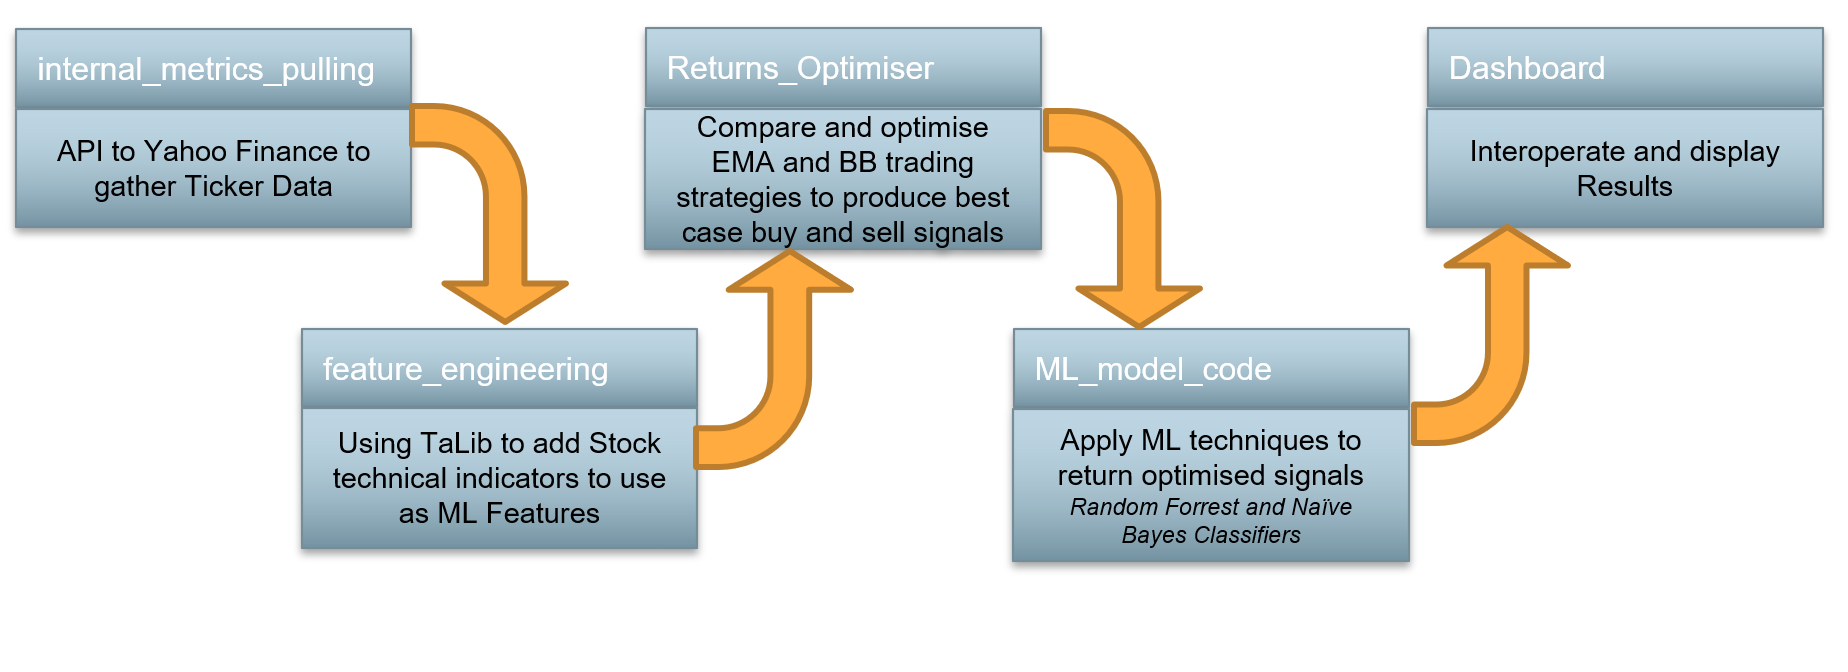
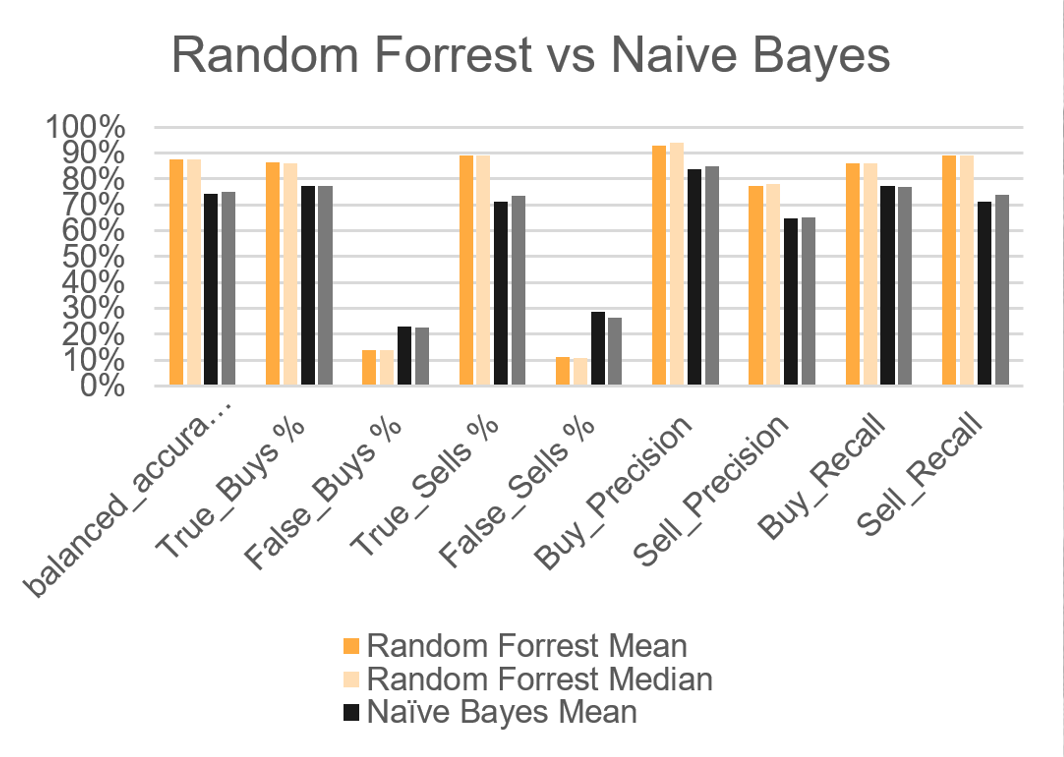
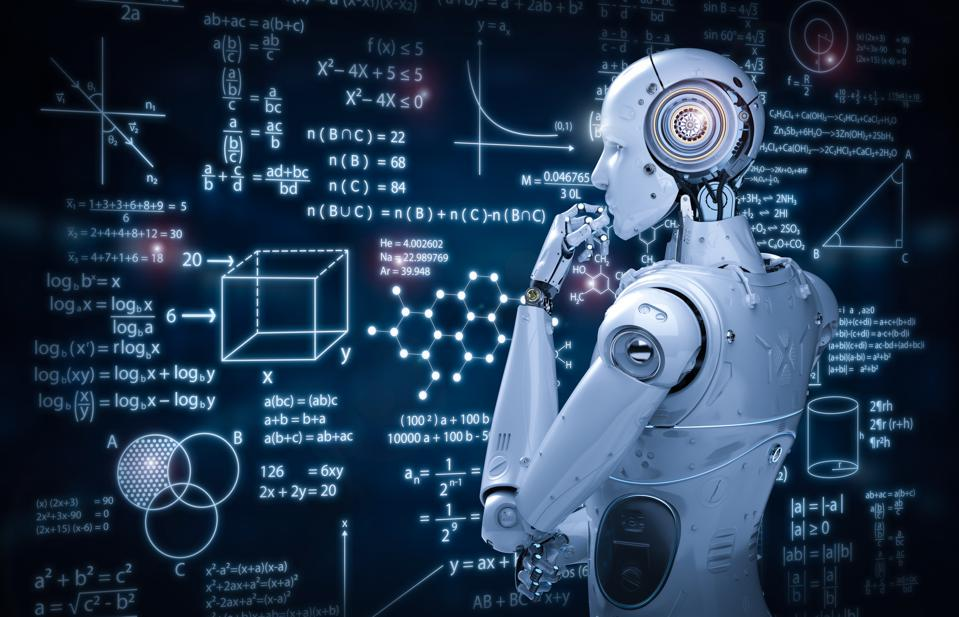
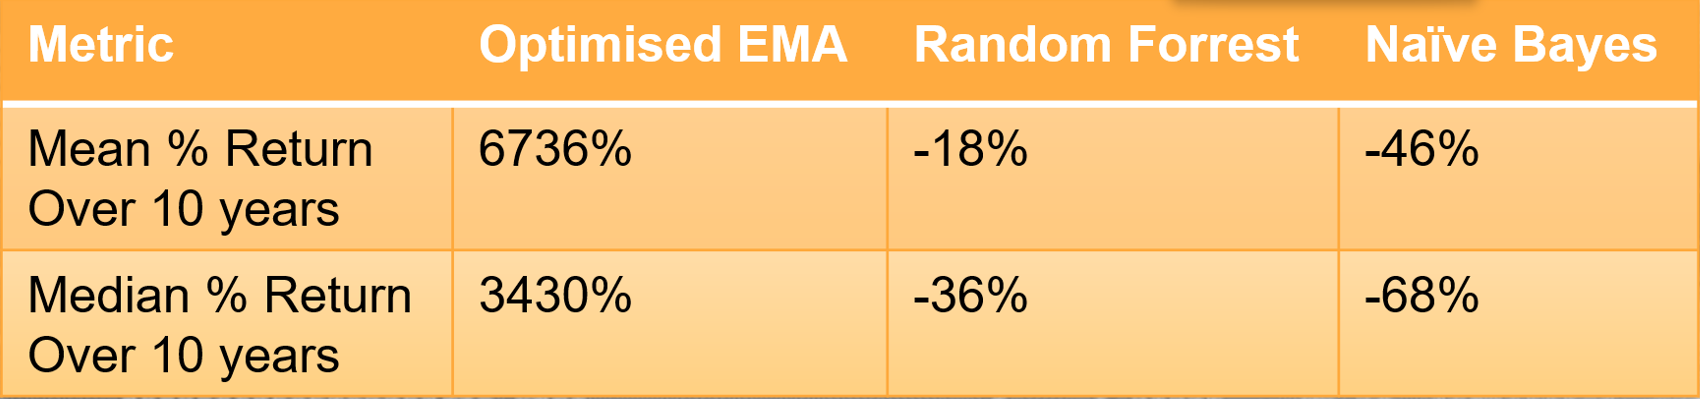
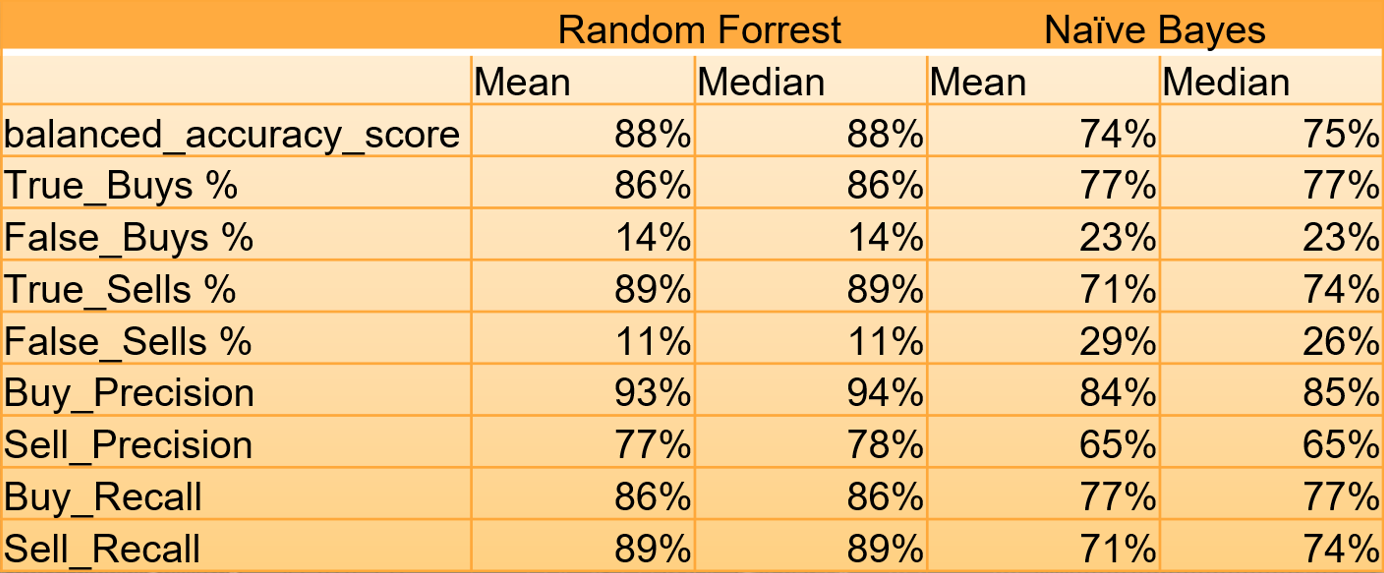

In [147]:
dashboard = pn.Tabs(
    ('Welcome', welcome_pane),
    ('Welcome 2', welcome_pane_2),
    ('Classification Report', tab_1),
    ('ROI', tab_2),
    ('Summary Analysis Report', tab_3),
    ('Summary Analysis Report 2', tab_4),
)
dashboard.servable()